### Exploratory Data Analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Global_Superstore2.csv')

In [3]:
df.head(7)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
df.drop(['Row ID','Postal Code'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


In [7]:
object_cols = ['Ship Mode','Segment','City','State','Country','Market','Region','Category','Sub-Category']
def Unique_features(object_cols):
    for feature in object_cols:

        print(f'Feature_name: {feature} :-\n Unique_values: {df[feature].unique()}\n')
Unique_features(object_cols)

Feature_name: Ship Mode :-
 Unique_values: ['Same Day' 'Second Class' 'First Class' 'Standard Class']

Feature_name: Segment :-
 Unique_values: ['Consumer' 'Corporate' 'Home Office']

Feature_name: City :-
 Unique_values: ['New York City' 'Wollongong' 'Brisbane' ... 'Abilene' 'Felahiye'
 'Victoria Falls']

Feature_name: State :-
 Unique_values: ['New York' 'New South Wales' 'Queensland' ... 'Manicaland' 'Kabarole'
 'Matabeleland North']

Feature_name: Country :-
 Unique_values: ['United States' 'Australia' 'Germany' 'Senegal' 'New Zealand'
 'Afghanistan' 'Saudi Arabia' 'Brazil' 'China' 'France' 'Italy' 'Tanzania'
 'Poland' 'United Kingdom' 'Mexico' 'El Salvador' 'Taiwan' 'India'
 'Dominican Republic' 'Democratic Republic of the Congo' 'Indonesia'
 'Uruguay' 'Iran' 'Mozambique' 'Bangladesh' 'Spain' 'Ukraine' 'Nicaragua'
 'Morocco' 'Canada' 'Philippines' 'Austria' 'Colombia' 'Netherlands'
 'Malaysia' 'Ecuador' 'Thailand' 'Somalia' 'Guatemala' 'Belarus'
 'Cambodia' 'South Africa' 'Japan' 

In [8]:
df['Postal Code'].nunique()

631

In [9]:
100*(df.isnull().sum().loc['Postal Code']/len(df))

80.51472021836615

In [10]:
df['Country'].nunique()

147

In [11]:
df = df.drop(['Postal Code','Row ID','Order ID','Country'],axis=1)

In [12]:
sns.set_style(style='whitegrid')

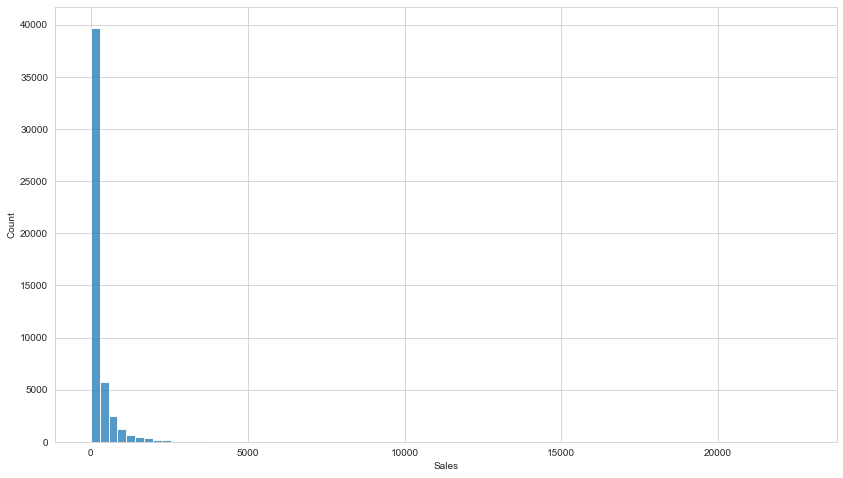

In [13]:
plt.figure(figsize=(14,8))
sns.histplot(data=df,x='Sales',bins=80)
plt.show()

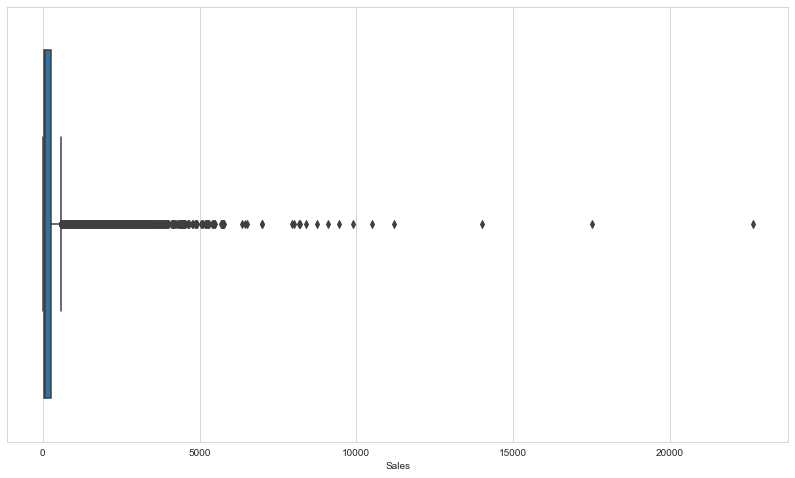

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='Sales')
plt.show()

In [15]:
df = df.drop(df[(df['Sales']>13000) & (df['Category']=='Technology')].index)

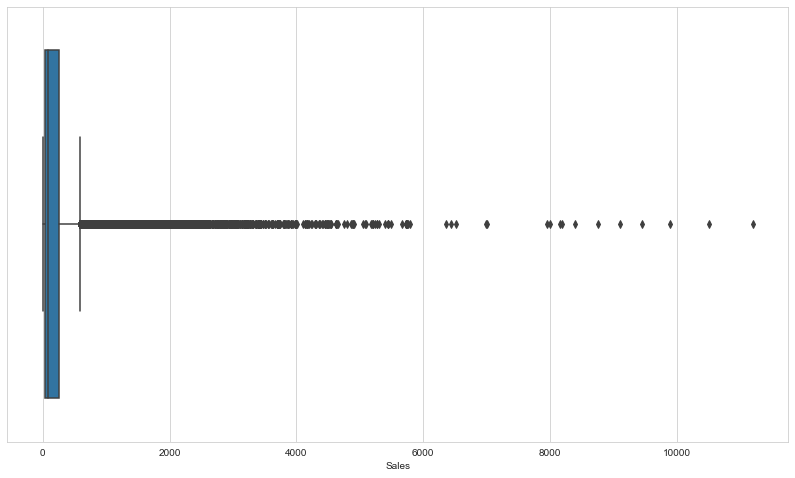

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='Sales')
plt.show()

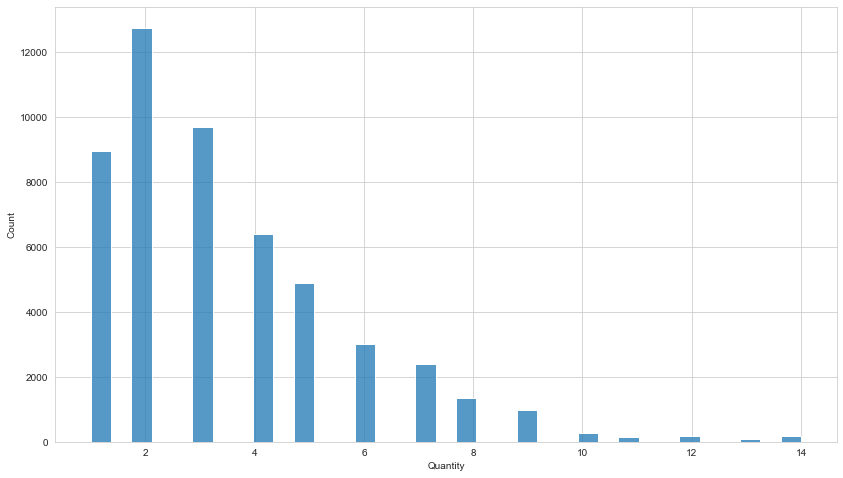

In [17]:
plt.figure(figsize=(14,8))
sns.histplot(data=df,x='Quantity',bins=35)
plt.show()

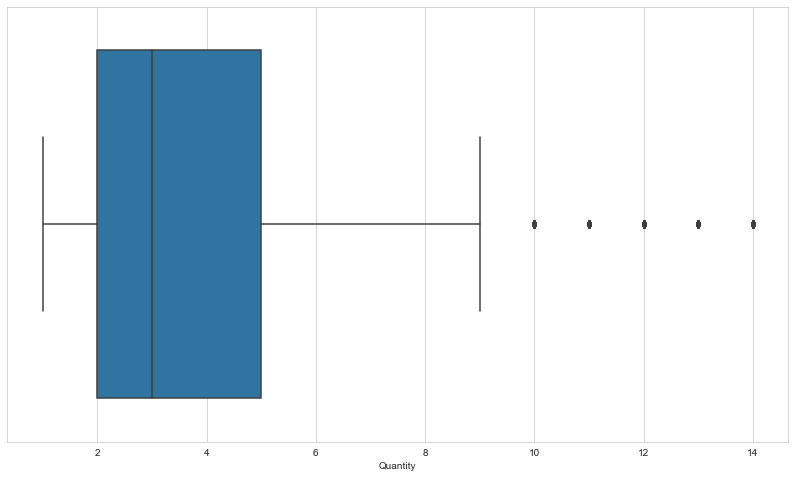

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='Quantity')
plt.show()

In [19]:
df = df.drop(df[df['Quantity']>=10].index)

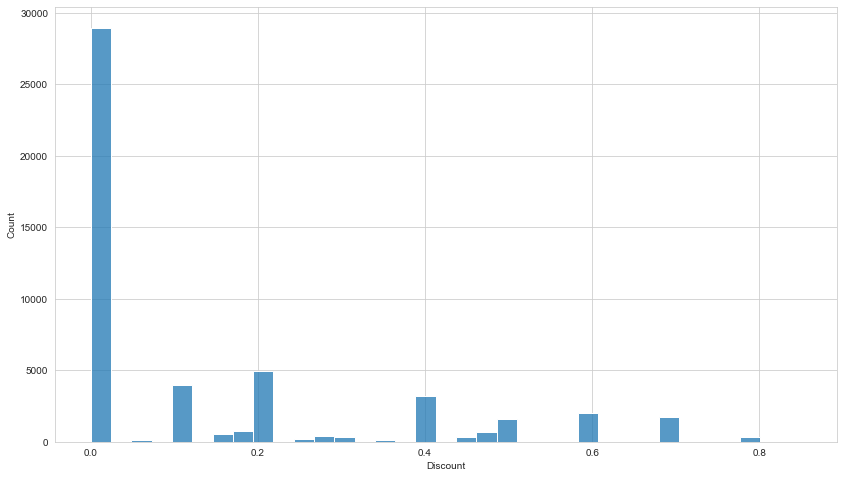

In [20]:
plt.figure(figsize=(14,8))
sns.histplot(data=df,x='Discount',bins=35)
plt.show()

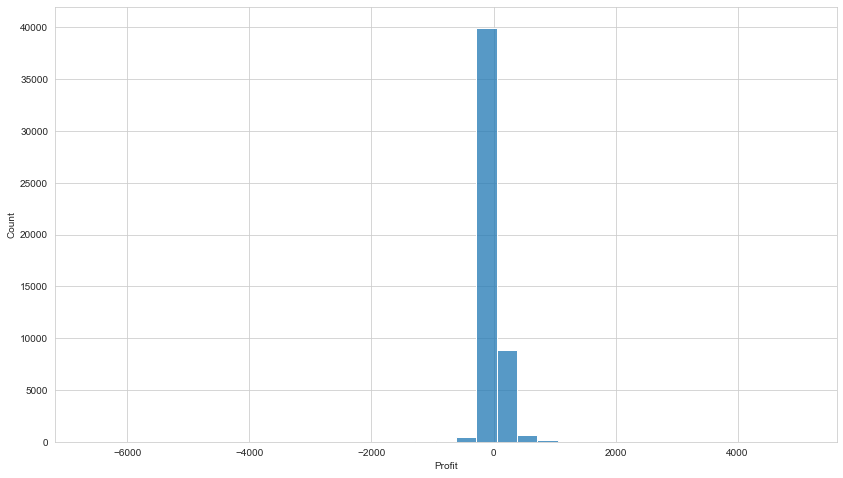

In [21]:
plt.figure(figsize=(14,8))
sns.histplot(data=df,x='Profit',bins=35)
plt.show()

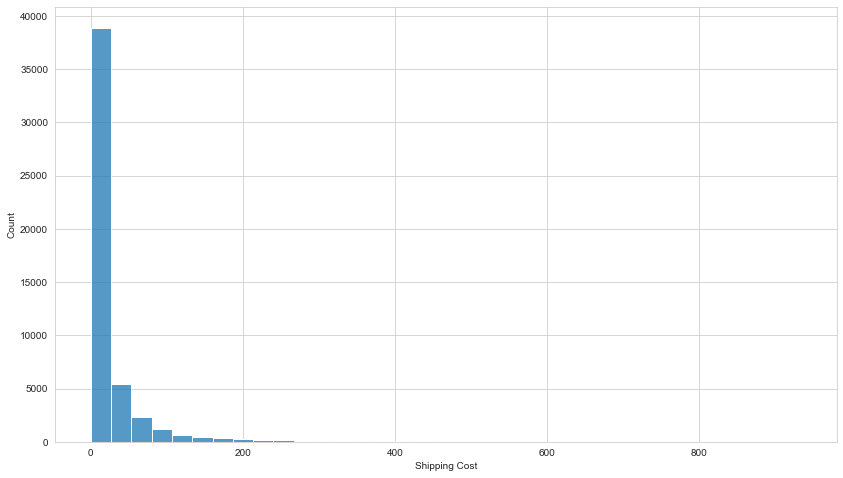

In [22]:
plt.figure(figsize=(14,8))
sns.histplot(data=df,x='Shipping Cost',bins=35)
plt.show()

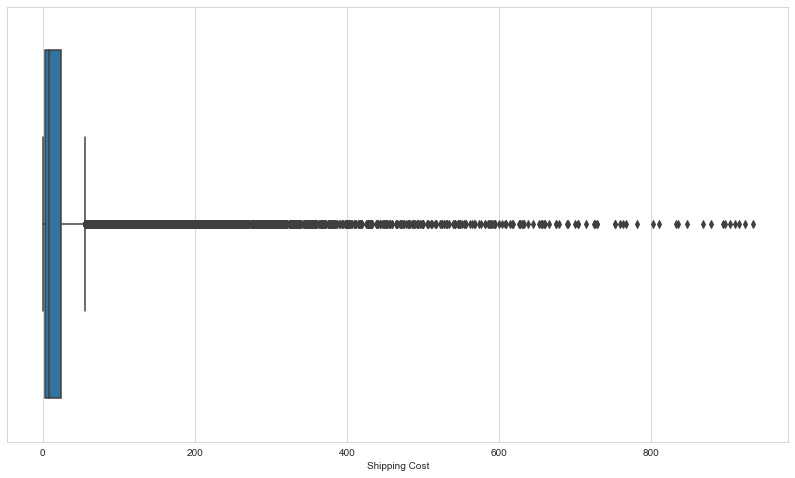

In [23]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x='Shipping Cost')
plt.show()

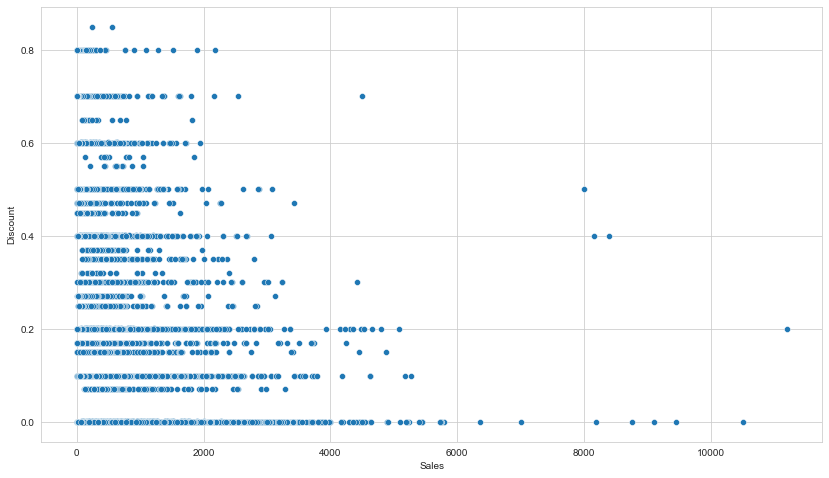

In [24]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,y='Discount',x='Sales')
plt.show()

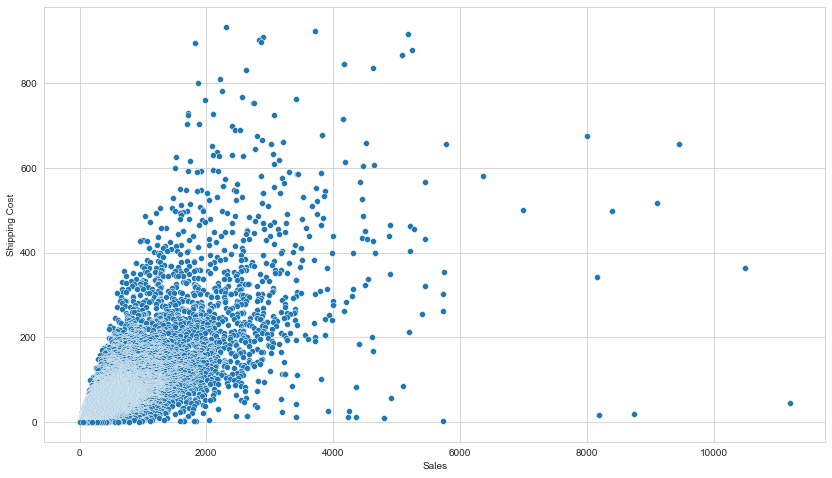

In [25]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,y='Shipping Cost',x='Sales')
plt.show()

In [59]:
df['Category'].value_counts()

Office Supplies    30718
Technology          9966
Furniture           9726
Name: Category, dtype: int64

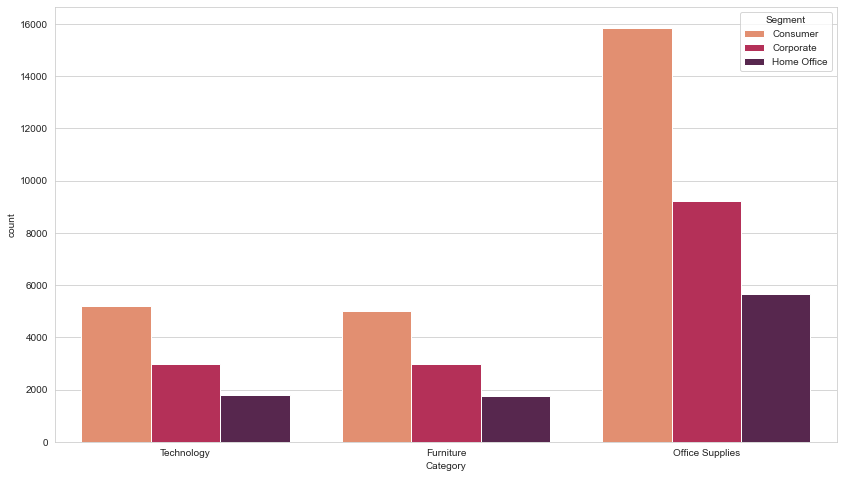

In [64]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Category',palette='rocket_r',hue='Segment')
plt.show()

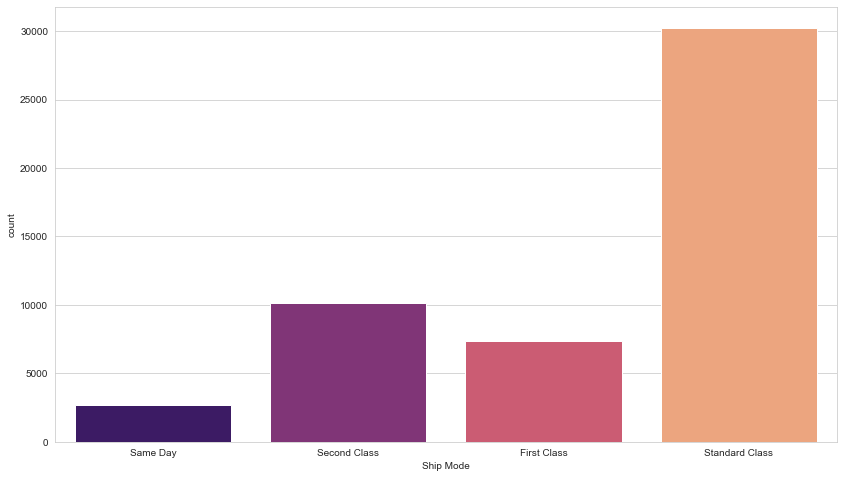

In [26]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Ship Mode',palette='magma')
plt.show()

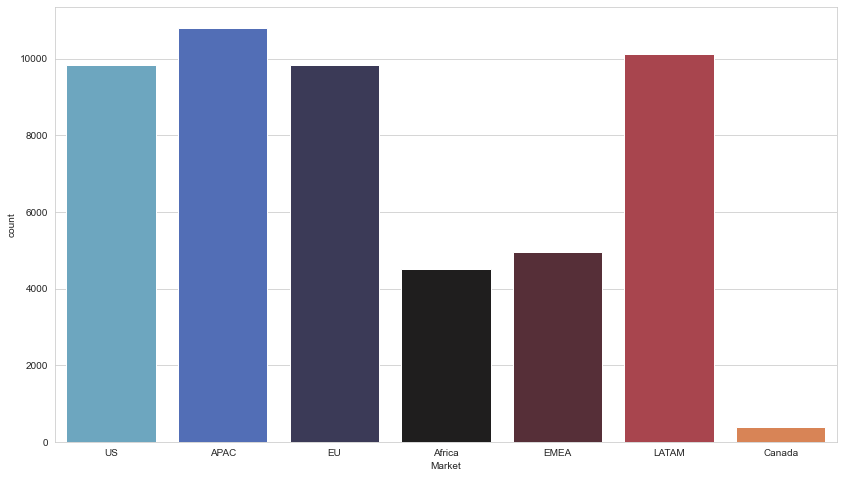

In [27]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Market',palette='icefire')
plt.show()

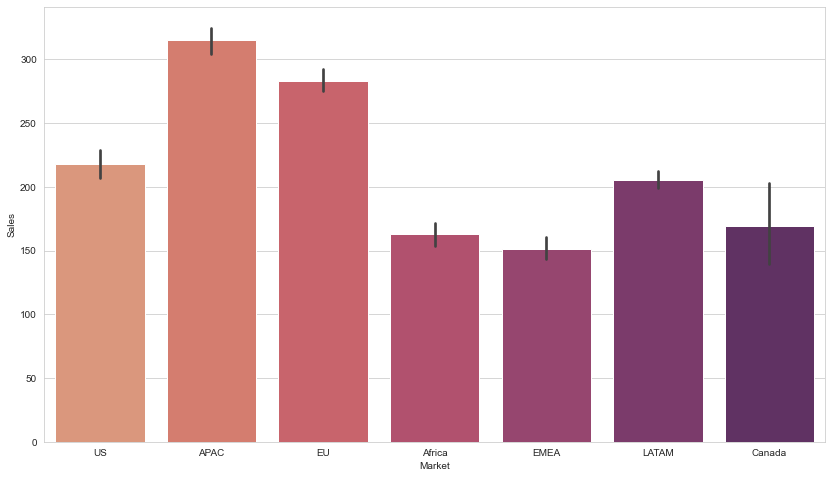

In [28]:
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='Market',y='Sales',palette='flare')
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

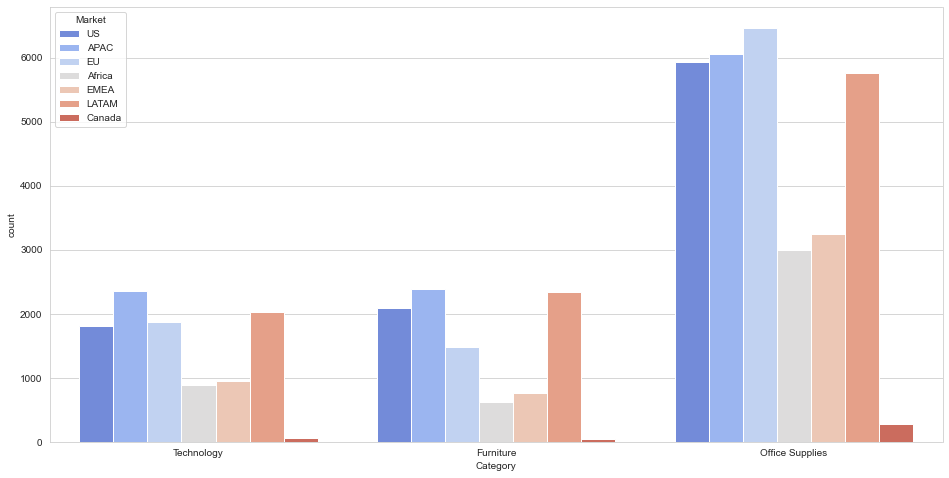

In [84]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,hue='Market',x='Category',palette='coolwarm')

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

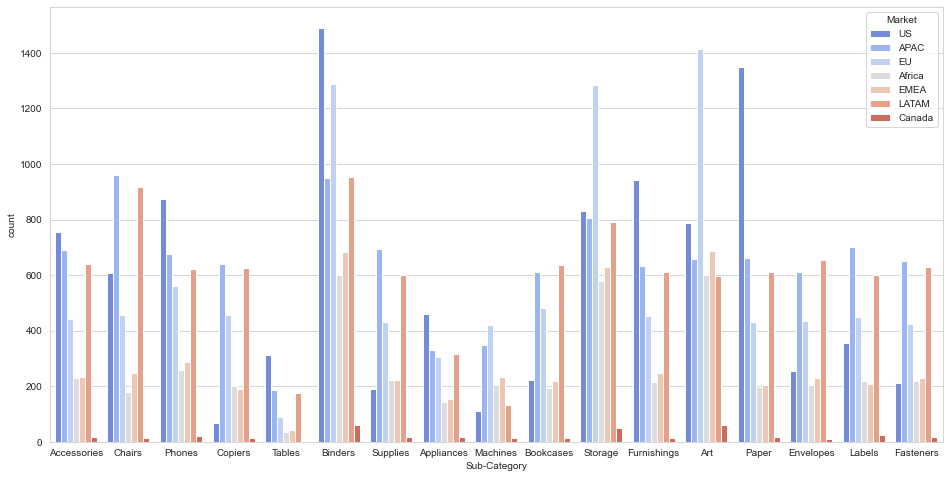

In [87]:
plt.figure(figsize=(16,8))
sns.countplot(data=df,hue='Market',x='Sub-Category',palette='coolwarm')

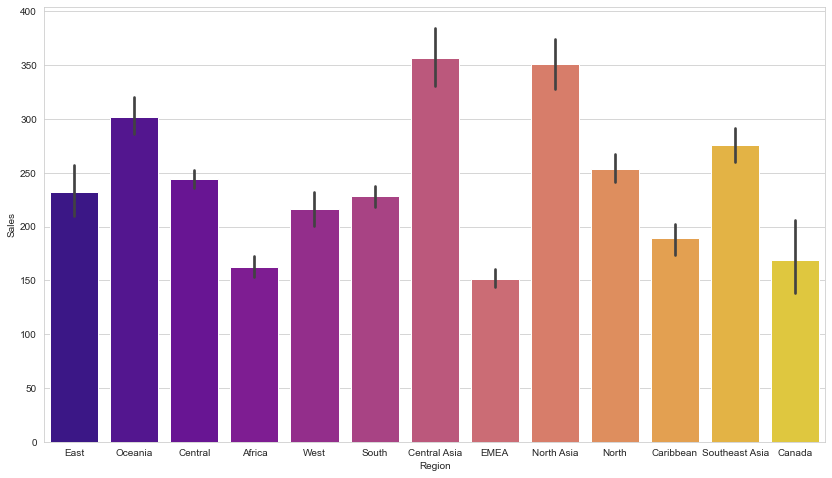

In [29]:
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='Region',y='Sales',palette='plasma')
plt.show()

In [63]:
object_cols = ['Region','Category','Sub-Category']
Unique_features(object_cols)

Feature_name: Region :-
 Unique_values: ['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']

Feature_name: Category :-
 Unique_values: ['Technology' 'Furniture' 'Office Supplies']

Feature_name: Sub-Category :-
 Unique_values: ['Accessories' 'Chairs' 'Phones' 'Copiers' 'Tables' 'Binders' 'Supplies'
 'Appliances' 'Machines' 'Bookcases' 'Storage' 'Furnishings' 'Art' 'Paper'
 'Envelopes' 'Labels' 'Fasteners']



In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

In [31]:
df['Order Year'] = df['Order Date'].apply(lambda x: x.year)
df['Order Month'] = df['Order Date'].apply(lambda x: x.month)

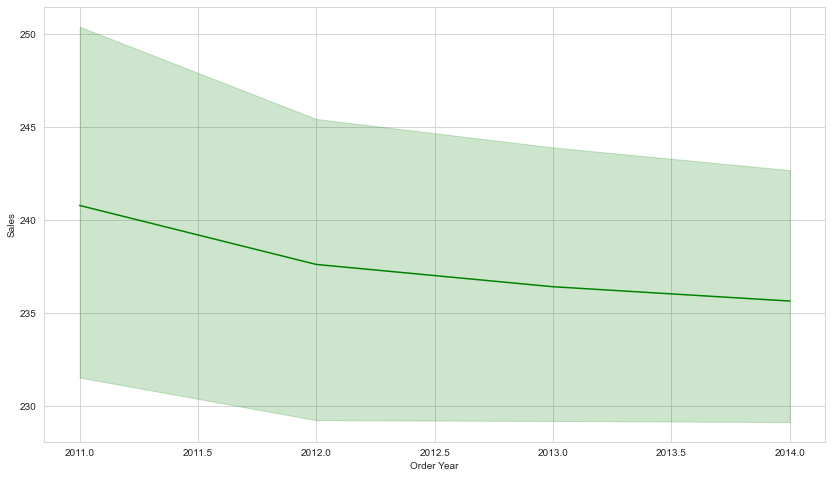

In [32]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Order Year',y='Sales',color='green')
plt.show()

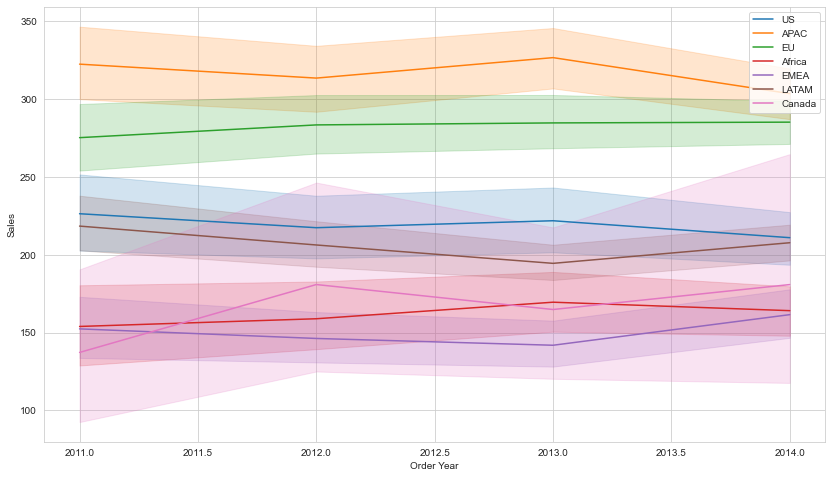

In [33]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Order Year',y='Sales',hue='Market')
plt.legend(loc='upper right')
plt.show()

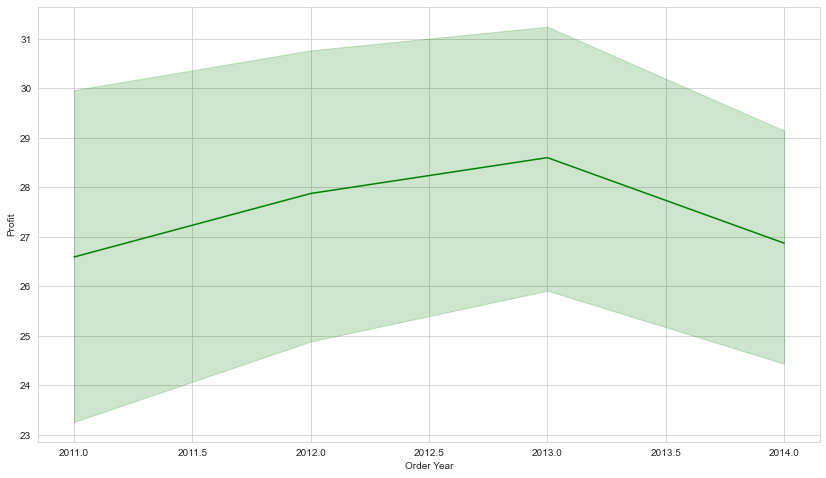

In [34]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Order Year',y='Profit',color='green')
plt.show()

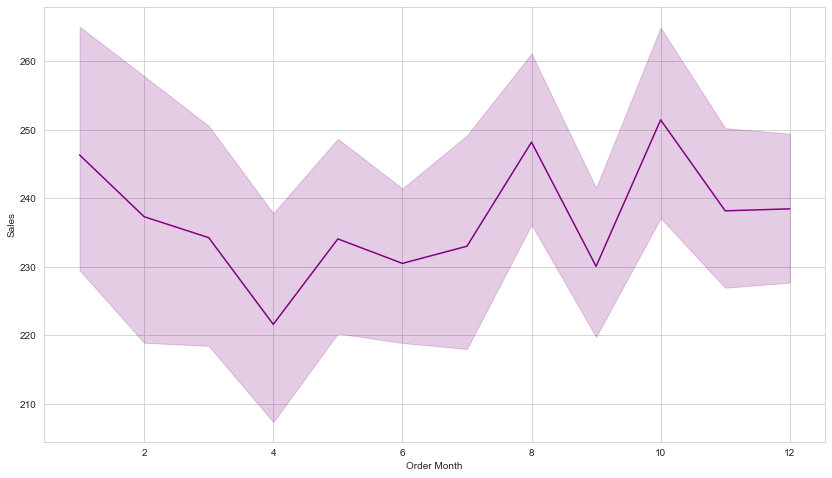

In [36]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Order Month',y='Sales',color='purple')
plt.show()

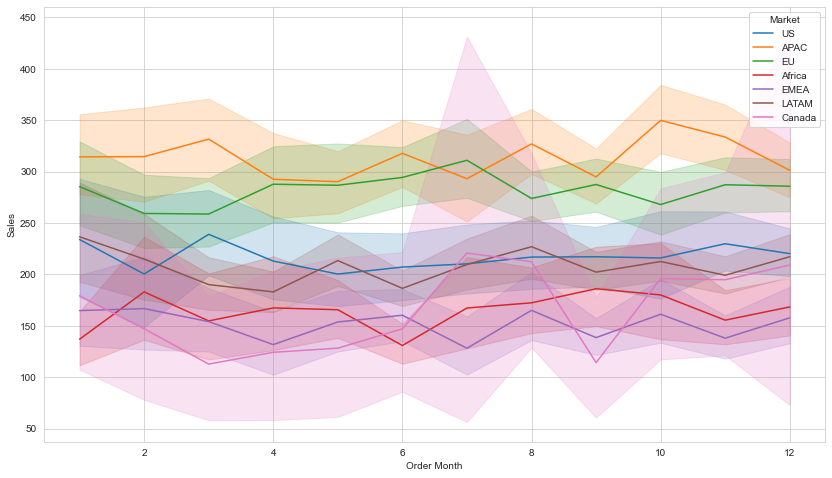

In [54]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Order Month',y='Sales',hue='Market')
plt.show()

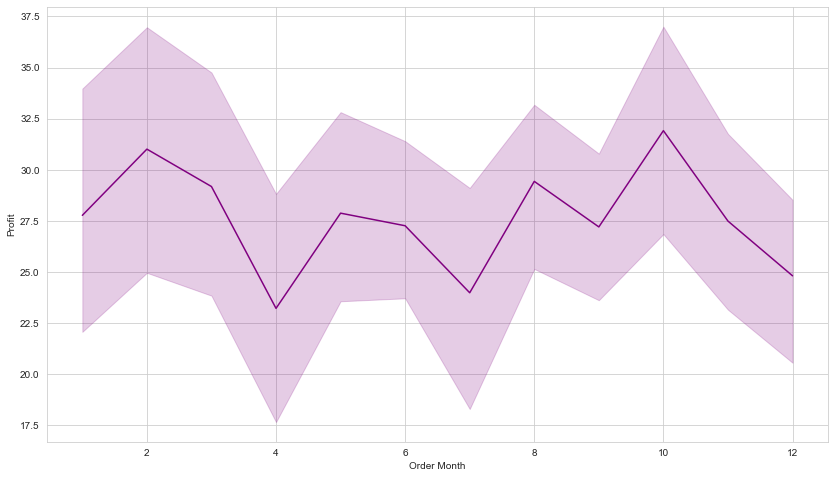

In [38]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,x='Order Month',y='Profit',color='purple')
plt.show()

In [42]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True)

In [43]:
df['Ship Year'] = df['Ship Date'].apply(lambda x: x.year)
df['Ship Month'] = df['Ship Date'].apply(lambda x: x.month)

In [44]:
df['Delivery Period'] = (df['Ship Date'] - df['Order Date']).dt.days

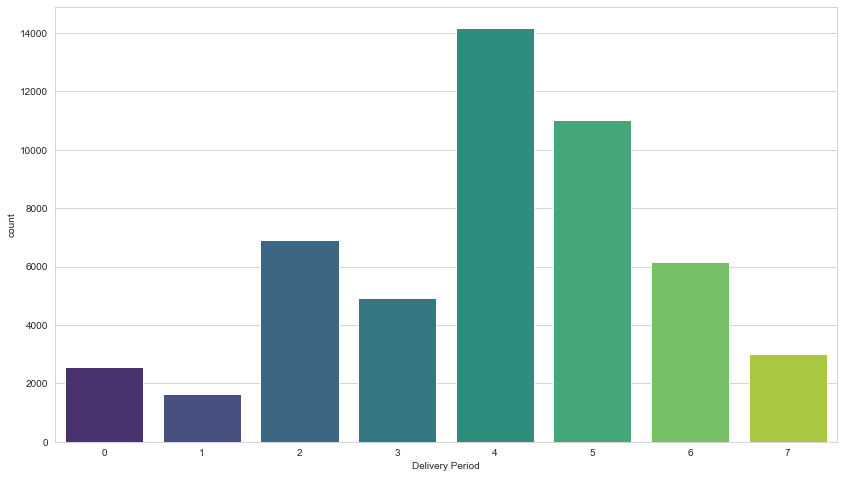

In [52]:
plt.figure(figsize=(14,8))
sns.countplot(data=df,x='Delivery Period',palette='viridis')
plt.show()

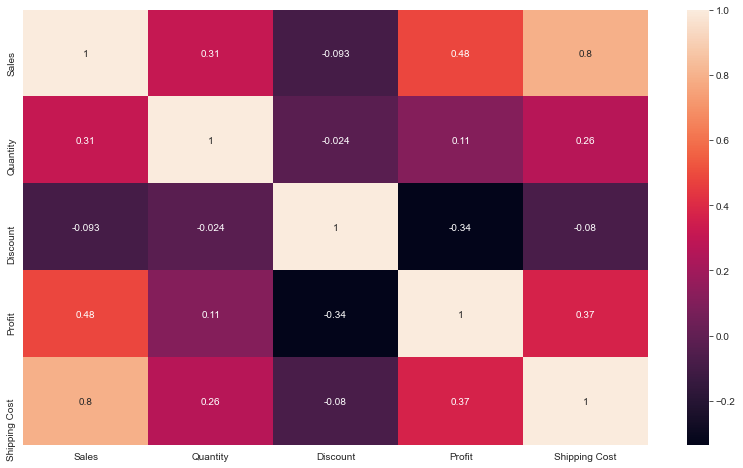

In [129]:
plt.figure(figsize=(14,8))
sns.heatmap(data=df[['Sales', 'Quantity','Discount', 'Profit', 'Shipping Cost']].corr(),annot=True)
plt.show()

### Feature Engineering

In [88]:
features = df.copy()

In [90]:
features.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Market,Region,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Ship Year,Ship Month,Delivery Period
0,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,US,East,...,7,0.0,762.1845,933.57,Critical,2012,7,2012,7,0
1,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,APAC,Oceania,...,9,0.1,-288.7650,923.63,Critical,2013,2,2013,2,2
2,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,APAC,Oceania,...,9,0.1,919.9710,915.49,Medium,2013,10,2013,10,1
3,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,EU,Central,...,5,0.1,-96.5400,910.16,Medium,2013,1,2013,1,2
4,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Africa,Africa,...,8,0.0,311.5200,903.04,Critical,2013,11,2013,11,1


In [94]:
features = features.drop(['Order Date','Ship Date','Customer Name','Customer ID','City',
                         'State','Region','Product ID','Product Name','Category'],axis=1)

In [100]:
enc_object = pd.get_dummies(features.select_dtypes(include='object'))

In [104]:
features = features.drop(['Ship Mode', 'Segment', 'Market', 'Sub-Category', 'Order Priority'],axis=1)

In [109]:
features = pd.concat([features,enc_object],axis=1)

In [130]:
features = features.drop('Profit',axis=1)

In [131]:
features = features.drop('Ship Year',axis=1)

In [147]:
X = features.drop('Sales',axis=1)
y = features['Sales']

**Scaling and Splitting:**

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [157]:
scaler = StandardScaler()

In [158]:
scaler.fit(X_train)

StandardScaler()

In [159]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Linear Regression:**

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
linear_model = LinearRegression()

In [164]:
linear_model.fit(scaled_X_train,y_train)

LinearRegression()

In [165]:
linear_prediction = linear_model.predict(scaled_X_test)

In [169]:
linear_prediction

array([-102.38758568,  369.79991432,  378.42491432, ...,   70.54991432,
        124.23741432,  -26.45008568])

In [170]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [171]:
mean_absolute_error(y_test,linaer_prediction)

111.34526925600667

In [172]:
np.sqrt(mean_squared_error(y_test,linear_prediction))

253.52179068963082

**Ensemeble Models:**

In [179]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [184]:
rfr_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()
abr_model = AdaBoostRegressor()

**Random Forest Regressor:**

In [185]:
rfr_model.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [186]:
rfr_prediction = svr_model.predict(scaled_X_test)

In [188]:
mean_absolute_error(y_test,rfr_prediction)

139.72588166696787

In [189]:
np.sqrt(mean_squared_error(y_test,rfr_prediction))

400.53920720878205

**Gradient Boosting:**

In [190]:
gbr_model.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [191]:
gbr_prediction = gbr_model.predict(scaled_X_test)

In [192]:
mean_absolute_error(y_test,gbr_prediction)

70.91410168302652

In [193]:
np.sqrt(mean_squared_error(y_test,gbr_prediction))

194.66459152022466

**AdaBoosting:**

abr_model.fit(scaled_X_train,y_train)

In [195]:
abr_prediction = abr_model.predict(scaled_X_test)

In [196]:
mean_absolute_error(y_test,abr_prediction)

539.7713428003029

In [197]:
np.sqrt(mean_squared_error(y_test,abr_prediction))

601.1674970634575

In [223]:
from sklearn.neighbors import KNeighborsRegressor

In [224]:
knn_model = KNeighborsRegressor()

In [225]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsRegressor()

In [226]:
knn_prediction = knn_model.predict(scaled_X_test)

In [227]:
mean_absolute_error(y_test,knn_prediction)

118.74140989954773

In [228]:
np.sqrt(mean_squared_error(y_test,knn_prediction))

263.1153773973045

**Artificial Neural Network:**

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [218]:
model = Sequential()

model.add(Dense(42,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [219]:
model.fit(x=scaled_X_train,y=y_train.values,
          validation_data=(scaled_X_test,y_test.values),
          batch_size=128,epochs=1000)

Epoch 1/1000
296/296 [==============================] - 9s 14ms/step - loss: 160136.5469 - val_loss: 84789.9219
Epoch 2/1000
296/296 [==============================] - 3s 10ms/step - loss: 61037.6133 - val_loss: 60895.8359
Epoch 3/1000
296/296 [==============================] - 2s 8ms/step - loss: 51171.1797 - val_loss: 55468.9805
Epoch 4/1000
296/296 [==============================] - 2s 7ms/step - loss: 48182.5742 - val_loss: 52447.8047
Epoch 5/1000
296/296 [==============================] - 2s 7ms/step - loss: 45648.5469 - val_loss: 49185.0469
Epoch 6/1000
296/296 [==============================] - 2s 7ms/step - loss: 42661.1445 - val_loss: 45582.1484
Epoch 7/1000
296/296 [==============================] - 2s 7ms/step - loss: 39644.3359 - val_loss: 42780.3320
Epoch 8/1000
296/296 [==============================] - 2s 6ms/step - loss: 37612.5742 - val_loss: 41361.2344
Epoch 9/1000
296/296 [==============================] - 1s 5ms/step - loss: 36401.0117 - val_loss: 40192.7305
Epoch 1

Epoch 75/1000
296/296 [==============================] - 1s 4ms/step - loss: 29293.7168 - val_loss: 33927.6172
Epoch 76/1000
296/296 [==============================] - 1s 4ms/step - loss: 29126.4609 - val_loss: 33979.5547
Epoch 77/1000
296/296 [==============================] - 1s 5ms/step - loss: 29100.9043 - val_loss: 34286.7578
Epoch 78/1000
296/296 [==============================] - 1s 4ms/step - loss: 29034.5957 - val_loss: 33929.6523
Epoch 79/1000
296/296 [==============================] - 1s 4ms/step - loss: 29001.9414 - val_loss: 33997.3008
Epoch 80/1000
296/296 [==============================] - 1s 4ms/step - loss: 29092.1250 - val_loss: 34067.8594
Epoch 81/1000
296/296 [==============================] - 1s 5ms/step - loss: 28981.3574 - val_loss: 34101.6562
Epoch 82/1000
296/296 [==============================] - 1s 4ms/step - loss: 28954.1641 - val_loss: 33934.0117
Epoch 83/1000
296/296 [==============================] - 1s 4ms/step - loss: 28928.6777 - val_loss: 33895.8984
E

296/296 [==============================] - 1s 5ms/step - loss: 27451.5742 - val_loss: 34125.7656
Epoch 149/1000
296/296 [==============================] - 2s 5ms/step - loss: 27306.7383 - val_loss: 33856.6289
Epoch 150/1000
296/296 [==============================] - 1s 5ms/step - loss: 27274.3184 - val_loss: 33861.4883
Epoch 151/1000
296/296 [==============================] - 1s 5ms/step - loss: 27284.4785 - val_loss: 33962.2852
Epoch 152/1000
296/296 [==============================] - 1s 5ms/step - loss: 27349.5410 - val_loss: 34077.2188
Epoch 153/1000
296/296 [==============================] - 1s 5ms/step - loss: 27284.2012 - val_loss: 33739.2344
Epoch 154/1000
296/296 [==============================] - 1s 5ms/step - loss: 27215.9531 - val_loss: 33832.0508
Epoch 155/1000
296/296 [==============================] - 1s 5ms/step - loss: 27286.5254 - val_loss: 33990.5391
Epoch 156/1000
296/296 [==============================] - 2s 6ms/step - loss: 27173.9238 - val_loss: 34094.1094
Epoch 1

296/296 [==============================] - 2s 5ms/step - loss: 24494.8926 - val_loss: 36254.3789
Epoch 222/1000
296/296 [==============================] - 1s 5ms/step - loss: 24263.8301 - val_loss: 36049.6992
Epoch 223/1000
296/296 [==============================] - 1s 5ms/step - loss: 24332.7520 - val_loss: 35741.0938
Epoch 224/1000
296/296 [==============================] - 1s 5ms/step - loss: 24337.9629 - val_loss: 35443.5625
Epoch 225/1000
296/296 [==============================] - 1s 5ms/step - loss: 24485.2832 - val_loss: 35494.5078
Epoch 226/1000
296/296 [==============================] - 1s 5ms/step - loss: 24186.4316 - val_loss: 35751.8359
Epoch 227/1000
296/296 [==============================] - 1s 5ms/step - loss: 24046.7832 - val_loss: 35739.1289
Epoch 228/1000
296/296 [==============================] - 1s 4ms/step - loss: 24124.7227 - val_loss: 35670.2461
Epoch 229/1000
296/296 [==============================] - 1s 5ms/step - loss: 24007.5430 - val_loss: 35831.1445
Epoch 2

296/296 [==============================] - 1s 4ms/step - loss: 19654.2637 - val_loss: 42826.8477
Epoch 295/1000
296/296 [==============================] - 2s 5ms/step - loss: 19570.7617 - val_loss: 42375.1289
Epoch 296/1000
296/296 [==============================] - 1s 5ms/step - loss: 19459.6562 - val_loss: 40964.2148
Epoch 297/1000
296/296 [==============================] - 1s 5ms/step - loss: 19322.9629 - val_loss: 42213.7148
Epoch 298/1000
296/296 [==============================] - 1s 5ms/step - loss: 19137.4902 - val_loss: 42658.8516
Epoch 299/1000
296/296 [==============================] - 1s 5ms/step - loss: 19155.9707 - val_loss: 41631.9023
Epoch 300/1000
296/296 [==============================] - 2s 5ms/step - loss: 19251.0273 - val_loss: 42212.7344
Epoch 301/1000
296/296 [==============================] - 1s 5ms/step - loss: 18808.0137 - val_loss: 40923.1719
Epoch 302/1000
296/296 [==============================] - 1s 5ms/step - loss: 18893.9805 - val_loss: 41544.1953
Epoch 3

296/296 [==============================] - 1s 4ms/step - loss: 14062.4824 - val_loss: 50121.6875
Epoch 368/1000
296/296 [==============================] - 1s 4ms/step - loss: 14310.6416 - val_loss: 45903.7812
Epoch 369/1000
296/296 [==============================] - 1s 4ms/step - loss: 14104.2217 - val_loss: 49498.6875
Epoch 370/1000
296/296 [==============================] - 1s 5ms/step - loss: 14056.4629 - val_loss: 49557.6680
Epoch 371/1000
296/296 [==============================] - 1s 5ms/step - loss: 13938.2725 - val_loss: 50846.2109
Epoch 372/1000
296/296 [==============================] - 2s 6ms/step - loss: 14018.4805 - val_loss: 45170.6484
Epoch 373/1000
296/296 [==============================] - 3s 10ms/step - loss: 13683.9756 - val_loss: 50300.6719
Epoch 374/1000
296/296 [==============================] - 2s 8ms/step - loss: 13657.7529 - val_loss: 47121.0820
Epoch 375/1000
296/296 [==============================] - 2s 8ms/step - loss: 13689.3135 - val_loss: 48698.3242
Epoch 

296/296 [==============================] - 2s 6ms/step - loss: 12416.1143 - val_loss: 54013.6836
Epoch 441/1000
296/296 [==============================] - 1s 4ms/step - loss: 12346.6162 - val_loss: 52226.6445
Epoch 442/1000
296/296 [==============================] - 1s 4ms/step - loss: 12778.8262 - val_loss: 49291.5391
Epoch 443/1000
296/296 [==============================] - 1s 4ms/step - loss: 12655.3271 - val_loss: 49034.7812
Epoch 444/1000
296/296 [==============================] - 1s 4ms/step - loss: 12750.1045 - val_loss: 50925.9102
Epoch 445/1000
296/296 [==============================] - 1s 4ms/step - loss: 12610.8916 - val_loss: 50767.7773
Epoch 446/1000
296/296 [==============================] - 1s 4ms/step - loss: 12585.2812 - val_loss: 49953.0352
Epoch 447/1000
296/296 [==============================] - 2s 6ms/step - loss: 12455.2539 - val_loss: 55436.8789
Epoch 448/1000
296/296 [==============================] - 2s 8ms/step - loss: 12563.4512 - val_loss: 47470.8594
Epoch 4

296/296 [==============================] - 1s 4ms/step - loss: 12141.4736 - val_loss: 49451.8086
Epoch 514/1000
296/296 [==============================] - 1s 4ms/step - loss: 11778.0098 - val_loss: 52548.6836
Epoch 515/1000
296/296 [==============================] - 1s 4ms/step - loss: 11727.4580 - val_loss: 48247.3047
Epoch 516/1000
296/296 [==============================] - 1s 4ms/step - loss: 12114.7627 - val_loss: 49947.1836
Epoch 517/1000
296/296 [==============================] - 1s 5ms/step - loss: 12016.1836 - val_loss: 49784.6406
Epoch 518/1000
296/296 [==============================] - 1s 4ms/step - loss: 11875.2471 - val_loss: 50102.9062
Epoch 519/1000
296/296 [==============================] - 1s 4ms/step - loss: 12069.9385 - val_loss: 48319.6406
Epoch 520/1000
296/296 [==============================] - 1s 4ms/step - loss: 12285.6514 - val_loss: 50883.0859
Epoch 521/1000
296/296 [==============================] - 1s 5ms/step - loss: 12103.2139 - val_loss: 48842.0859
Epoch 5

296/296 [==============================] - 1s 4ms/step - loss: 11661.6553 - val_loss: 46430.0000
Epoch 587/1000
296/296 [==============================] - 1s 4ms/step - loss: 11475.1758 - val_loss: 48203.3555
Epoch 588/1000
296/296 [==============================] - 1s 4ms/step - loss: 11321.4492 - val_loss: 49174.3320
Epoch 589/1000
296/296 [==============================] - 1s 4ms/step - loss: 11521.2695 - val_loss: 50598.1562
Epoch 590/1000
296/296 [==============================] - 1s 4ms/step - loss: 11614.2100 - val_loss: 51134.5078
Epoch 591/1000
296/296 [==============================] - 1s 4ms/step - loss: 11978.6670 - val_loss: 48590.1523
Epoch 592/1000
296/296 [==============================] - 1s 4ms/step - loss: 11998.2578 - val_loss: 49206.1836
Epoch 593/1000
296/296 [==============================] - 1s 4ms/step - loss: 11792.1084 - val_loss: 53137.3672
Epoch 594/1000
296/296 [==============================] - 1s 4ms/step - loss: 11663.0820 - val_loss: 50534.9492
Epoch 5

296/296 [==============================] - 1s 5ms/step - loss: 11143.1045 - val_loss: 48917.4648
Epoch 660/1000
296/296 [==============================] - 2s 5ms/step - loss: 11276.3936 - val_loss: 45136.2305
Epoch 661/1000
296/296 [==============================] - 1s 5ms/step - loss: 11494.9121 - val_loss: 48212.3516
Epoch 662/1000
296/296 [==============================] - 2s 5ms/step - loss: 11431.3799 - val_loss: 50371.6328
Epoch 663/1000
296/296 [==============================] - 1s 4ms/step - loss: 11445.9180 - val_loss: 47102.0586
Epoch 664/1000
296/296 [==============================] - 1s 4ms/step - loss: 10924.8906 - val_loss: 50801.2617
Epoch 665/1000
296/296 [==============================] - 2s 5ms/step - loss: 11118.8965 - val_loss: 48748.2773
Epoch 666/1000
296/296 [==============================] - 2s 6ms/step - loss: 11166.3926 - val_loss: 47951.4141
Epoch 667/1000
296/296 [==============================] - 2s 7ms/step - loss: 11028.7314 - val_loss: 48892.9570
Epoch 6

296/296 [==============================] - 1s 5ms/step - loss: 10694.9785 - val_loss: 49449.8789
Epoch 733/1000
296/296 [==============================] - 1s 4ms/step - loss: 10676.5986 - val_loss: 47788.7422
Epoch 734/1000
296/296 [==============================] - 1s 5ms/step - loss: 10748.3105 - val_loss: 50382.5742
Epoch 735/1000
296/296 [==============================] - 1s 5ms/step - loss: 10938.8838 - val_loss: 46916.4844
Epoch 736/1000
296/296 [==============================] - 2s 5ms/step - loss: 10796.5752 - val_loss: 49420.2578
Epoch 737/1000
296/296 [==============================] - 1s 5ms/step - loss: 10627.2227 - val_loss: 48000.4219
Epoch 738/1000
296/296 [==============================] - 1s 5ms/step - loss: 10827.8330 - val_loss: 50370.5586
Epoch 739/1000
296/296 [==============================] - 1s 5ms/step - loss: 11111.0312 - val_loss: 50317.7930
Epoch 740/1000
296/296 [==============================] - 1s 5ms/step - loss: 10932.9854 - val_loss: 47795.2227
Epoch 7

296/296 [==============================] - 1s 5ms/step - loss: 10652.4180 - val_loss: 47051.6484
Epoch 806/1000
296/296 [==============================] - 1s 5ms/step - loss: 10612.5791 - val_loss: 48360.3516
Epoch 807/1000
296/296 [==============================] - 1s 5ms/step - loss: 10607.8545 - val_loss: 49416.5781
Epoch 808/1000
296/296 [==============================] - 1s 4ms/step - loss: 10542.5645 - val_loss: 47421.2969
Epoch 809/1000
296/296 [==============================] - 1s 5ms/step - loss: 10684.4668 - val_loss: 50623.6289
Epoch 810/1000
296/296 [==============================] - 1s 5ms/step - loss: 10452.1836 - val_loss: 49989.6328
Epoch 811/1000
296/296 [==============================] - 1s 5ms/step - loss: 10607.8369 - val_loss: 49697.7227
Epoch 812/1000
296/296 [==============================] - 1s 5ms/step - loss: 10798.7314 - val_loss: 47860.6953
Epoch 813/1000
296/296 [==============================] - 1s 5ms/step - loss: 10560.2949 - val_loss: 48900.7109
Epoch 8

296/296 [==============================] - 1s 5ms/step - loss: 10358.9844 - val_loss: 47343.0938
Epoch 879/1000
296/296 [==============================] - 2s 5ms/step - loss: 10267.5264 - val_loss: 49467.7227
Epoch 880/1000
296/296 [==============================] - 1s 5ms/step - loss: 10404.7568 - val_loss: 49589.9844
Epoch 881/1000
296/296 [==============================] - 1s 5ms/step - loss: 10276.0918 - val_loss: 48164.9297
Epoch 882/1000
296/296 [==============================] - 1s 4ms/step - loss: 10372.2119 - val_loss: 47174.0625
Epoch 883/1000
296/296 [==============================] - 2s 5ms/step - loss: 10374.9473 - val_loss: 49833.8594
Epoch 884/1000
296/296 [==============================] - 1s 5ms/step - loss: 10367.9834 - val_loss: 48074.2266
Epoch 885/1000
296/296 [==============================] - 1s 5ms/step - loss: 10334.5156 - val_loss: 45957.6562
Epoch 886/1000
296/296 [==============================] - 2s 5ms/step - loss: 10473.6104 - val_loss: 48588.5742
Epoch 8

296/296 [==============================] - 1s 5ms/step - loss: 10299.4814 - val_loss: 46463.6250
Epoch 952/1000
296/296 [==============================] - 1s 5ms/step - loss: 10373.5049 - val_loss: 48410.2656
Epoch 953/1000
296/296 [==============================] - 1s 5ms/step - loss: 10226.3574 - val_loss: 48989.7891
Epoch 954/1000
296/296 [==============================] - 1s 5ms/step - loss: 10701.4463 - val_loss: 48519.8008
Epoch 955/1000
296/296 [==============================] - 2s 5ms/step - loss: 10314.2021 - val_loss: 47116.7461
Epoch 956/1000
296/296 [==============================] - 2s 5ms/step - loss: 10101.9648 - val_loss: 50581.4258
Epoch 957/1000
296/296 [==============================] - 2s 5ms/step - loss: 9953.2627 - val_loss: 49177.1680
Epoch 958/1000
296/296 [==============================] - 2s 5ms/step - loss: 10149.7441 - val_loss: 47909.1719
Epoch 959/1000
296/296 [==============================] - 2s 5ms/step - loss: 10155.7998 - val_loss: 50246.5781
Epoch 96

In [221]:
ann_predictions = model.predict(scaled_X_test)

In [222]:
np.sqrt(mean_squared_error(y_test,ann_predictions))

216.9267955671306

**Conclusion:**

**Seens Like Gradient Boost outperforms all other algorithoms even its not giving best result when compared with ann and linear regression, it can perform even better than now if the hyper parameters are adjusted littel bit.**